In [4]:
import cv2
import numpy as np
from scipy.signal import correlate

In [18]:
def blur(img, kernel):
    '''
    Floute une image avec noyau constant.

    img: un tableau de shape height x width x 3
    ker: un tableau qui peut avoir des dimensions différentes de l'image
    '''
    output = np.zeros(img.shape)
    for i in range(img.shape[-1]):
        output[:,:,i] = correlate(img[:,:,i], kernel, mode='same')
    
    return output

In [ ]:
test = np.ones((10,10,3))
ker_test = np.ones((5,2))
blur(test,ker_test)

array([[[ 3.,  3.,  3.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.]],

       [[ 4.,  4.,  4.],
        [ 8.,  8.,  8.],
        [ 8.,  8.,  8.],
        [ 8.,  8.,  8.],
        [ 8.,  8.,  8.],
        [ 8.,  8.,  8.],
        [ 8.,  8.,  8.],
        [ 8.,  8.,  8.],
        [ 8.,  8.,  8.],
        [ 8.,  8.,  8.]],

       [[ 5.,  5.,  5.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.]],

       [[ 5.,  5.,  5.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 

In [ ]:
def to_polar(img, center = [0,0]):
    result = np.zeros(())

def circonvolution(img, ker, center = [0,0]):
    """
    Circular convolution of an image img with ker, a circular kernel.
    Arguments:
    - img : array of size h x w x 3
    - ker : array of size kh x kw; in R, theta coordinates
    - center : array of size 2
    """
    result_polar = np.zeros(img.shape)
    

In [73]:
def radial_ellipse_blur(image, center, distortion_factor=-0.5, blur_kernel=0):
    """    
    Parameters:
    - image: Input image (numpy array).
    - center: Tuple (x, y) defining the center of radial distortion.
    - distortion_factor: Factor by which circles turn into ellipses.
    - blur_kernel: Kernel size for Gaussian blur.
    
    Returns:
    - Transformed image.
    """
    h, w = image.shape[:2]
    y_indices, x_indices = np.indices((h, w))
    
    dx = x_indices - center[0]
    dy = y_indices - center[1]
    
    r = np.sqrt(dx**2 + dy**2) + 1e-6  # Avoid division by zero
    theta = np.arctan2(dy, dx)
    
    new_r = r * (1 + distortion_factor)  # Stretching
    
    new_x = (new_r * np.cos(theta) + center[0]).astype(np.float32)
    new_y = (new_r * np.sin(theta) + center[1]).astype(np.float32)
    
    distorted_img = cv2.remap(image, new_x, new_y, interpolation=cv2.INTER_LINEAR)
    
    # blurred_img = cv2.GaussianBlur(distorted_img, (blur_kernel, blur_kernel), 0)
    
    return distorted_img

In [70]:
def transform_image(image, f):
    '''
    Crée une image transformed de sorte que transformed(x,y) = image(f(x,y)).
    f peut même prendre des valeurs non entières
    '''
    h, w = image.shape[:2]
    y_indices, x_indices = np.indices((h, w))

    new_x, new_y = f(x_indices, y_indices)

    # Restreint les coordonées aux limites
    new_x = np.clip(new_x, 0, w - 1).astype(np.float32)
    new_y = np.clip(new_y, 0, h - 1).astype(np.float32)

    transformed = cv2.remap(image, new_x, new_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
    return transformed

In [84]:
def circular_motion_blur(image, center=(0, 0), angle_range=30, num_steps=30):
    acc = np.zeros_like(image, dtype=np.float32)
    angles = np.linspace(-angle_range / 2, angle_range / 2, num_steps)
    for angle in angles:
        M = cv2.getRotationMatrix2D(center, angle, 1)
        rotated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]),
                                 flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
        acc += rotated.astype(np.float32)
    blurred = (acc / num_steps).astype(image.dtype)
    return blurred

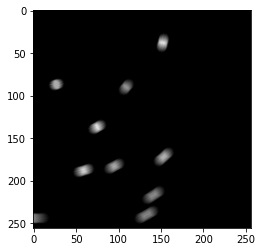

In [100]:
from matplotlib import pyplot as plt

image = cv2.imread("D:\Ecole\Git_deconvolution_astro\\astro_deconvo\original_images\PXL-4-cropped.jpg")
image = cv2.imread("D:\Ecole\Git_deconvolution_astro\\astro_deconvo\original_images\python_generated\generated_1.jpg")

output = circular_motion_blur(image, angle_range=4)
plt.imshow(output)

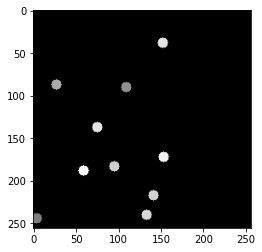

In [58]:
plt.imshow(image)

In [101]:
cv2.imwrite('D:\Ecole\Git_deconvolution_astro\\astro_deconvo\original_images\python_generated\\1-rotation_blur.jpg', output)

True

In [96]:
from skimage.transform import resize
from scipy.signal import convolve2d

def generate_radial_psf(image_shape, radial_function, normalize=True):
    """
    Comppute radial PSF.

    Inputs:
    image_shape : tuple, shape of the image.
    radial_function : function, function defining the radial dependence of the PSF.
    normalize : bool, normalize the PSF so that the sum = 1.

    Returns :
    psf : 2D array of shape image_shape representing the radial PSF.
    """
    h, w = image_shape
    y, x = np.meshgrid(np.linspace(-h//2, h//2, h), np.linspace(-w//2, w//2, w), indexing='ij')

    r = np.sqrt(x**2 + y**2)
    psf = radial_function(r) #for example lambda r: np.exp(-r**2 / (2 * sigma**2)) for gaussian psf
    if normalize:
        psf /= np.sum(psf)
    return psf

def moffat_psf(image_shape, alpha=3, beta=2.5, normalize=True):
    """
    Compute Moffat PSF.

    Inputs:
    image_shape : tuple, shape of the image.
    alpha : float, width parameter of the PSF (related to the FWHM).
    beta : float, parameter of the PSF wing decay.
    normalize : bool, normalize the PSF so that the sum = 1.

    Returns :
    psf : 2D array of shape image_shape representing the Moffat PSF.
    """
    h, w = image_shape[:2]
    
    y, x = np.meshgrid(np.linspace(-h//2, h//2, h), np.linspace(-w//2, w//2, w), indexing='ij')
    r2 = x**2 + y**2
    
    psf = (1 + r2 / alpha**2) ** -beta
    if normalize:
        psf /= np.sum(psf)
    return psf

def resize_image(image, target_size=(255, 255)):
    """
    Resize image to target size.

    Inputs:
    image : 2D array
    target_size : tuple, new size of the image (height, width).

    Returns :
    resized_image : resized 2D array.
    """
    if image.shape[:2] != target_size:
        resized_image = resize(image, target_size, preserve_range=True, anti_aliasing=True)
        return resized_image.astype(image.dtype)
    return image

def create_blurred_image(image, psf, target_size = (128, 128), mode = "same"):
    """Create a blurred image by convolving the image with the PSF.
    
    Inputs :
    image : 2D array, the original image.
    psf : 2D array, the point spread function.
    target_size : tuple, size of the target image (default = (128, 128)).
    mode : str, mode of the convolution (default = 'same').
    
    Returns :
    blurred_image : 2D array, the blurred image.
    """
    resized_image = resize_image(image, target_size)
    if resized_image.ndim == 3:
        resized_image = np.mean(resized_image, axis=2)
    blurred_image = convolve2d(resized_image, psf, mode=mode)
    return blurred_image

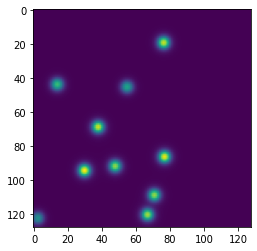

In [ ]:
img = cv2.imread("D:\Ecole\Git_deconvolution_astro\\astro_deconvo\original_images\python_generated\generated_1.jpg")
psf = moffat_psf(img.shape,)
output = create_blurred_image(img, psf)
plt.imshow(output, cmap=)

In [99]:
cv2.imwrite('D:\Ecole\Git_deconvolution_astro\\astro_deconvo\original_images\python_generated\\1-moffat_blur.jpg', output)

True